# Linear Regression Using Scikit Learn
In this section we developed a machine learning   model for two variables .
Which is simple linear regression model using scikit-learn and test its accuracy using given data.

# Simple Linear Regression
In this regression task we predict the percentage of marks obtained by student on the basis of how many hours he/she spend on study.ou model is simple linear model containing two variables

In [246]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [247]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Checking is  Datasets contain any null values  using build in ptrhon functions.

In [248]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

using info function we count tota number of non-null values in dataset separately

In [249]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Text(0.5, 1.0, 'Scatter plot of Hours vs Score')

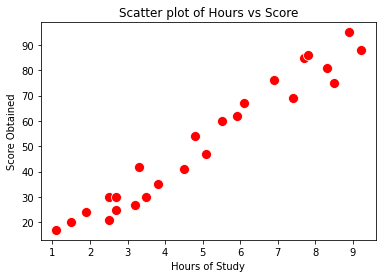

In [250]:
sns.scatterplot(data=s_data,x='Hours',y='Scores', color='r',s=100)
plt.xlabel('Hours of Study')
plt.ylabel('Score Obtained')
plt.title('Scatter plot of Hours vs Score')

from above graph we can clealy say that their positive linear relation between hours and scores obtained.

# Preparing the Data

Dividing Dataset into target variable and input variable 

In [251]:
X=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values

In [252]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

Now as we splitted our data into train test next we train our model using linear regression algorithm

In [253]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Training is completed")

Training is completed


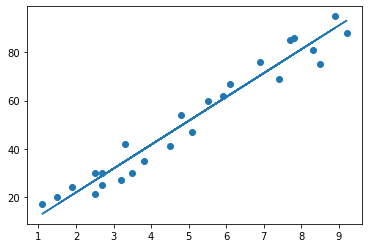

In [254]:
#plotting the regression line
line=lr.coef_*X+lr.intercept_
plt.scatter(X, y)
plt.plot(X,line)

As we trained our model now time to make predictions

In [255]:
print(x_test)
y_pred=lr.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [256]:
import random
a=random.choice(s_data['Hours']).reshape(-1,1)
print(a)
new_pred=lr.predict(a)
print("Predicted Score = {}".format(new_pred))

[[1.9]]
Predicted Score = [20.84840735]


In [257]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating the model

As we have obtained some prediction.
now its time to infer that how our prediction are differ from original values by using 
scikit learn metrics library we calculate it.
here we used mean absolute error which calculate difference between predicted and original values sum them and take thier 
mean.

In [258]:
from sklearn.metrics import mean_absolute_error
acc=mean_absolute_error(y_pred,y_test)
print('Mean Absolute Error:',acc)

Mean Absolute Error: 4.183859899002975
